# Explore here

In [3]:
import pandas as pd

df= pd.read_csv("/workspaces/machine-learning-python-template/data/raw/bank-marketing-campaign-data.csv", sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
for col in df.columns:
    if df[col].dtype == 'object':  # Selecciona columnas de tipo 'object'
        df[col], _ = pd.factorize(df[col])  # Factoriza y ignora los labels únicos devueltos

# Mostrar las primeras filas para verificar los cambios
print(df.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   56    0        0          0        0        0     0        0      0   
1   57    1        0          1        1        0     0        0      0   
2   37    1        0          1        0        1     0        0      0   
3   40    2        0          2        0        0     0        0      0   
4   56    1        0          1        0        0     1        0      0   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         1    999         0         0           1.1   
1            0  ...         1    999         0         0           1.1   
2            0  ...         1    999         0         0           1.1   
3            0  ...         1    999         0         0           1.1   
4            0  ...         1    999         0         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.85

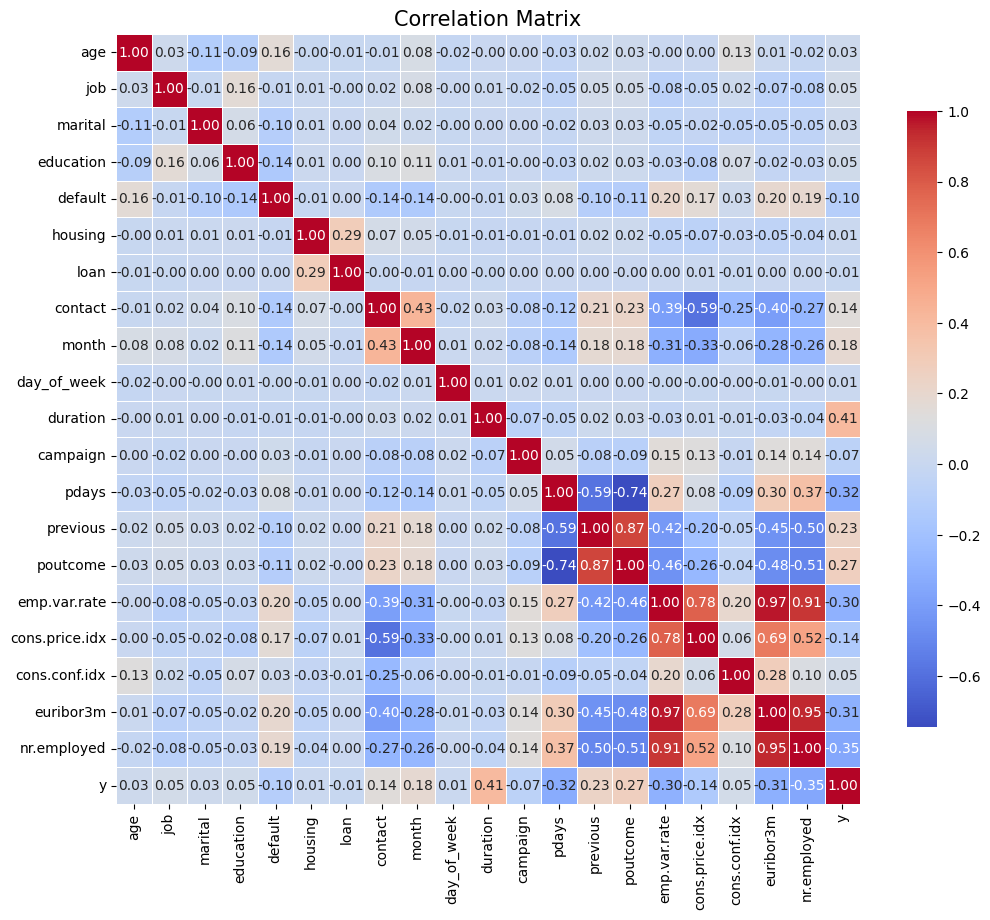

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', 
             xticklabels=corr.columns, yticklabels=corr.columns, 
             linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix', size=15)
plt.show()

Analizando las variables que más afectan a mi variable objetivo vemos que:

La tasa de variación del empleo (emp.var.rate) y el Euribor a 3 meses (euribor3m) están muy correlacionados positivamente, lo que sugiere que tienden a moverse en la misma dirección.
El número de empleados (nr.employed) también muestra fuertes correlaciones positivas tanto con la tasa emp.var.como con el euribor3m, lo que refleja cómo estos indicadores económicos están vinculados a las condiciones de empleo.
El Índice de Confianza del Consumidor (cons.conf.idx), por el contrario, está negativamente correlacionado con la tasa emp.var.y el euribor3m, lo que indica que a medida que las condiciones económicas (expresadas por las tasas de empleo y los tipos de interés) mejoran, la confianza del consumidor tiende a disminuir (nótese que los valores más altos de cons.conf.idx indican más pesimismo).
Pdays (días transcurridos desde que se contactó por última vez con el cliente) tiene una correlación negativa con previous, lo cual es lógico ya que contactos previos más frecuentes implican un contacto más reciente.

In [9]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop("y", axis = 1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ahora aplicar SelectKBest con Chi-cuadrado
selection_model = SelectKBest(chi2, k=5)
selection_model.fit(X_train_scaled, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns=X_test.columns.values[ix])

# Mostrar las primeras filas de las características seleccionadas en el entrenamiento
X_train_sel.head()

,previous,poutcome,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,0.000000,0.019497,0.203781
1,0.0,0.0,1.000000,0.981183,1.000000
2,0.0,0.0,0.333333,0.138291,0.512287
3,0.0,0.0,0.937500,0.956926,0.859735
4,0.0,0.0,0.937500,0.957379,0.859735


In [10]:
X_test_sel.head()

,previous,poutcome,emp.var.rate,euribor3m,nr.employed
0,0.142857,0.5,0.333333,0.150759,0.512287
1,0.000000,0.0,0.937500,0.958059,0.859735
2,0.142857,0.5,0.333333,0.153933,0.512287
3,0.000000,0.0,1.000000,0.982317,1.000000
4,0.000000,0.0,1.000000,0.981410,1.000000


In [12]:
X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)
X_train_sel.to_csv("/workspaces/machine-learning-python-template/data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("/workspaces/machine-learning-python-template/data/processed/clean_test.csv", index = False)

In [13]:
train_data = pd.read_csv("/workspaces/machine-learning-python-template/data/processed/clean_train.csv")
test_data = pd.read_csv("/workspaces/machine-learning-python-template/data/processed/clean_test.csv")

train_data.head()

,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,0.0,0.0,0.000000,0.019497,0.203781,1
1,0.0,0.0,1.000000,0.981183,1.000000,0
2,0.0,0.0,0.333333,0.138291,0.512287,0
3,0.0,0.0,0.937500,0.956926,0.859735,0
4,0.0,0.0,0.937500,0.957379,0.859735,0


In [14]:
X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8953629521728574

In [18]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [19]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [20]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [21]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
accuracy_score(y_test, y_pred)

0.8975479485311969

In [23]:
from pickle import dump

dump(model, open("/workspaces/machine-learning-python-template/models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))